### Creating a Machine Learning model to determine the color of the wine

#### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Installing opendatasets library to download the dataset
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

Downloading dataset from Kaggle website: https://www.kaggle.com/datasets/saigeethac/red-and-white-wine-quality-datasets?select=winequality-white.csv

In [ ]:
# Path to the dataset on kaggle website
dataset = r"https://www.kaggle.com/datasets/saigeethac/red-and-white-wine-quality-datasets?select=winequality-white.csv"

In [ ]:
# Downloading the dataset
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nipungupta26
Your Kaggle Key: ··········


100%|██████████| 95.5k/95.5k [00:00<00:00, 17.6MB/s]

In [ ]:
# Directory of the downloaded datasets in local system
data_dir = r'red-and-white-wine-quality-datasets'

In [ ]:
# Listing out the datasets
os.listdir(data_dir)

['winequality-white.csv', 'winequality-red.csv']

#### Reading the white and red wine datasets

In [ ]:
white_wine_data_dir = r"winequality-white.csv"
red_wine_data_dir = r"winequality-red.csv"


df_white_wine = pd.read_csv(data_dir + '/' + white_wine_data_dir, sep=';')
df_red_wine = pd.read_csv(data_dir + '/' + red_wine_data_dir, sep=';')

Adding a **color** column to each dataset

In [ ]:
df_white_wine['color'] = 'white'
df_red_wine['color'] = 'red'

In [ ]:
df_white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

In [ ]:
df_white_wine.shape

(4898, 13)

There are a total of 4898 records and 13 columns in the white wine dataframe

In [ ]:
df_red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [ ]:
df_red_wine.shape

(1599, 13)

There are a total of 1599 records and 13 columns in the red wine dataframe

Input variables (based on physicochemical tests):

 - fixed acidity
 - volatile acidity
 - citric acid
 - residual sugar
 - chlorides
 - free sulfur dioxide
 - total sulfur dioxide
 - density
 - pH
 - sulphates
 - alcohol
 - quality (score between 0 and 10)

*Concatenating the dataframes of white and red wines*

In [ ]:
df_wine = pd.concat([df_white_wine, df_red_wine])

In [ ]:
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  color  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white

During the training phase, the ML model should know only about the training data. But if the model gets to know about the test data during the training phase, then this is called data leakage.

So we should perform splitting of the dataset before applying feature engineering. After splitting, we will first apply feature engineering for the training data and then apply it on to the test data. This will help to reduce data leakage and overfitting.

But presence of duplicates can also cause data leakage. Therefore, we will first remove the duplicate records from the dataset and then perform train test split

#### Identifying and removing duplicate rows in the dataset

In [ ]:
df_wine.duplicated().sum()

1177

In [ ]:
#Removing the duplicates but retaining only the first instance of the duplicate row
df_wine = df_wine.drop_duplicates(keep='first')

In [ ]:
df_wine.duplicated().sum()

0

The indices of the dataframe will have to be reset from train test split

In [ ]:
df_wine.reset_index(inplace = True, drop = True)

In [ ]:
df_wine.shape

(5320, 13)

The red and white wine dataframes have been concatenated

#### Description of the dataset

In [ ]:
df_wine.describe().transpose()

count        mean        std      min      25%  \
fixed acidity         5320.0    7.215179   1.319671  3.80000   6.4000   
volatile acidity      5320.0    0.344130   0.168248  0.08000   0.2300   
citric acid           5320.0    0.318494   0.147157  0.00000   0.2400   
residual sugar        5320.0    5.048477   4.500180  0.60000   1.8000   
chlorides             5320.0    0.056690   0.036863  0.00900   0.0380   
free sulfur dioxide   5320.0   30.036654  17.805045  1.00000  16.0000   
total sulfur dioxide  5320.0  114.109023  56.774223  6.00000  74.0000   
density               5320.0    0.994535   0.002966  0.98711   0.9922   
pH                    5320.0    3.224664   0.160379  2.72000   3.1100   
sulphates             5320.0    0.533357   0.149743  0.22000   0.4300   
alcohol               5320.0   10.549241   1.185933  8.00000   9.5000   
quality               5320.0    5.795677   0.879772  3.00000   5.0000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.30000    0.41000    1.58000  
citric acid             0.31000    0.40000    1.66000  
residual sugar          2.70000    7.50000   65.80000  
chlorides               0.04700    0.06600    0.61100  
free sulfur dioxide    28.00000   41.00000  289.00000  
total sulfur dioxide  116.00000  153.25000  440.00000  
density                 0.99465    0.99677    1.03898  
pH                      3.21000    3.33000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.40000   11.40000   14.90000  
quality                 6.00000    6.00000    9.00000

#### Retrieving information about the dataset

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  color                 5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


The dataframe has 6497 rows and 13 columns

#### Unique colors in the dataset

In [ ]:
print(df_wine['color'].unique())

['white' 'red']


In [ ]:
print("Value count for feature color")
print(df_wine['color'].value_counts())

Value count for feature color
white    3961
red      1359
Name: color, dtype: int64


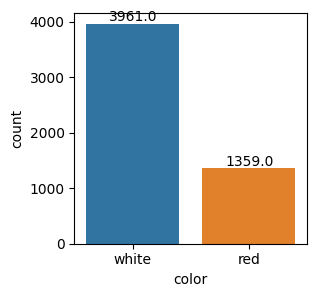

In [ ]:
plt.figure(figsize=(3,3))
plt.ticklabel_format(style='plain')
ax = sns.countplot(x= 'color', data=df_wine)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))

Pie chart showing **wine color** distribution

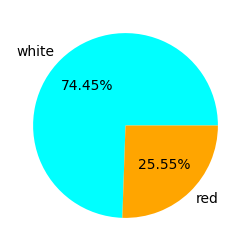

In [ ]:
plt.figure(figsize=(3,3))
plt.pie(df_wine['color'].value_counts(), labels=df_wine['color'].unique(), autopct='%0.2f%%', colors = ['cyan', 'orange'])
plt.show()

The data is heavily imbalanced and unevenly distributed. There are much more records for **white** wines than for **red** wines

Analysing the **quality** column

In [ ]:
print(df_wine['quality'].unique())

[6 5 7 8 4 3 9]


In [ ]:
print("Value count for feature color")
print(df_wine['quality'].value_counts())

Value count for feature color
6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64


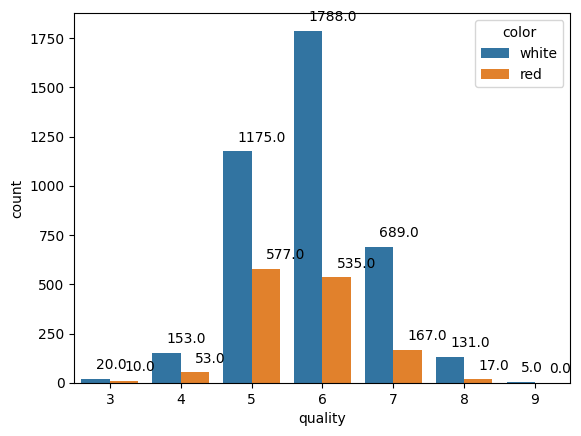

In [ ]:
plt.ticklabel_format(style='plain')
ax = sns.countplot(x='quality', data=df_wine, hue='color')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))

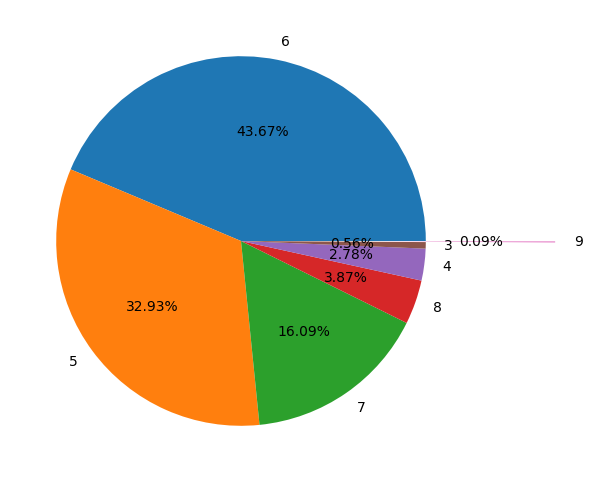

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(df_wine['quality'].value_counts(), labels=df_wine['quality'].unique(), autopct='%0.2f%%', explode=(0,0,0,0,0,0,0.7))
plt.show()

Wines with **quality** as 6 are the maximum in number whereas wines with **quality** as **3**, **4**, and **9** are very minimal

#### Splitting the dataset into training and testing datasets

Separating the independent variables and the dependent variable

In [ ]:
X = df_wine.drop(columns=["color"], axis=1)
Y = df_wine.color

Importing **train_test_split**

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42, shuffle=True)

The testing data size is set to **15%**

In [ ]:
X_train.shape

(4522, 12)

In [ ]:
X_test.shape

(798, 12)

In [ ]:
y_train.shape

(4522,)

In [ ]:
y_test.shape

(798,)

Joining the training dataframe

In [ ]:
df_train = X_train.join(y_train, how='inner')

Joining the testing dataframe

In [ ]:
df_test = X_test.join(y_test, how='inner')

Resetting the indices of the training and testing dataframes

In [ ]:
df_train.reset_index(inplace = True, drop = True)

In [ ]:
df_test.reset_index(inplace = True, drop = True)

## Data Preprocessing and cleaning

#### Checking if there is any missing value in the dataset

In [ ]:
df_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

*We observe there are no missing values in the training dataframe*

Extracting the continuous features from the data

In [ ]:
continuous_features = [feature for feature in df_train.select_dtypes(np.number).columns if feature not in ['quality', 'color']]

In [ ]:
continuous_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

## Plotting Boxplots to identify Univariate outliers

In [ ]:
def create_boxplots(dataset, feature_list, target):
    for feature in feature_list:
        plt.figure(figsize=(8,8))
        plt.subplot(2,2,1)
        plt.ticklabel_format(style='plain')
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        plt.ticklabel_format(style='plain')
        sns.boxplot(x=dataset[target], y=dataset[feature], data=dataset, hue=target, color='orange')
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

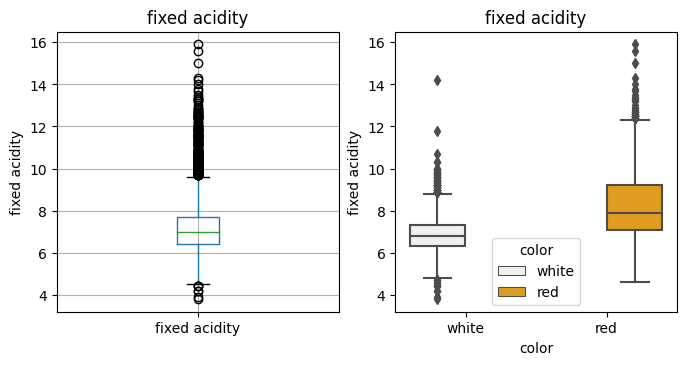

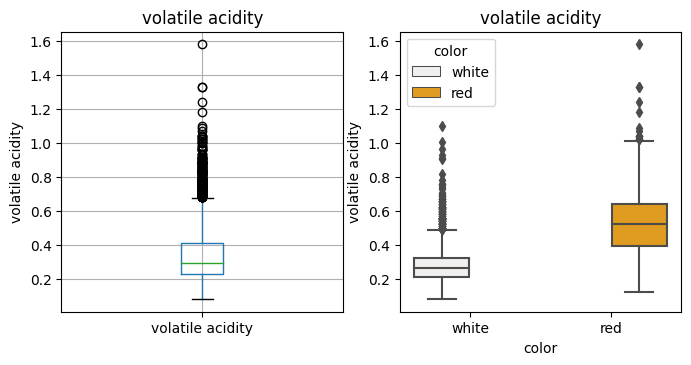

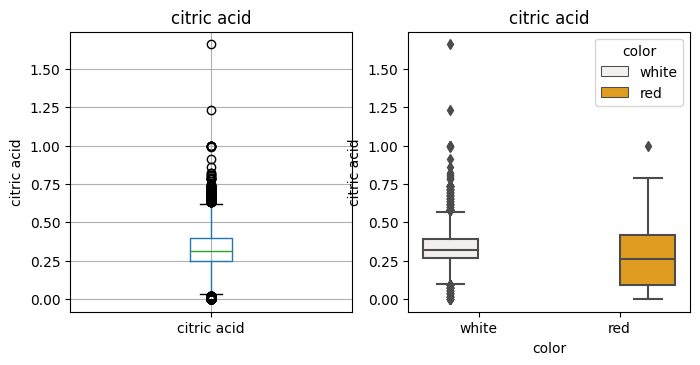

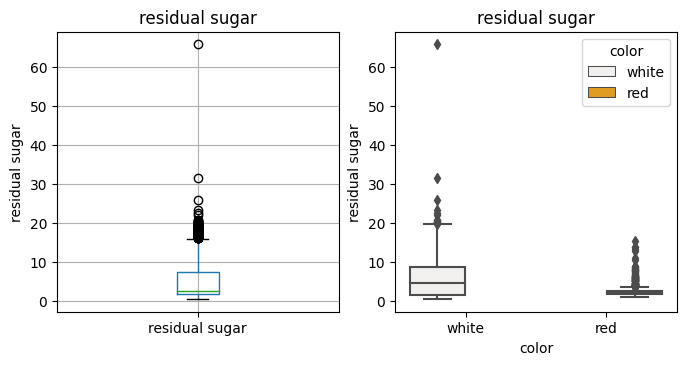

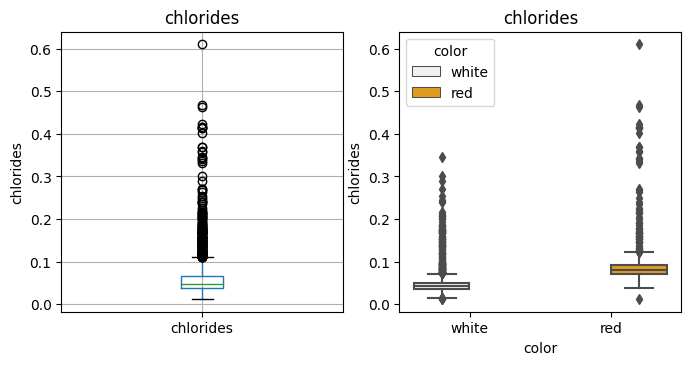

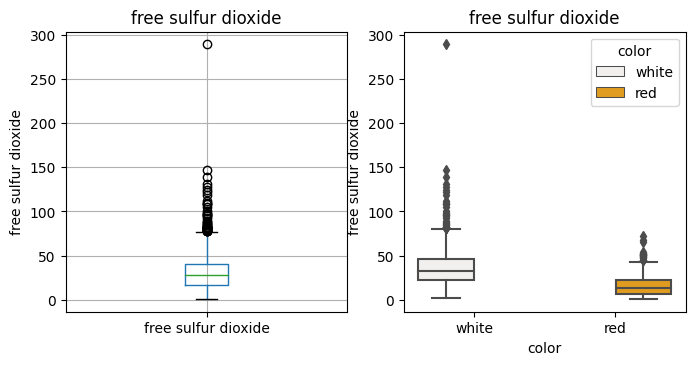

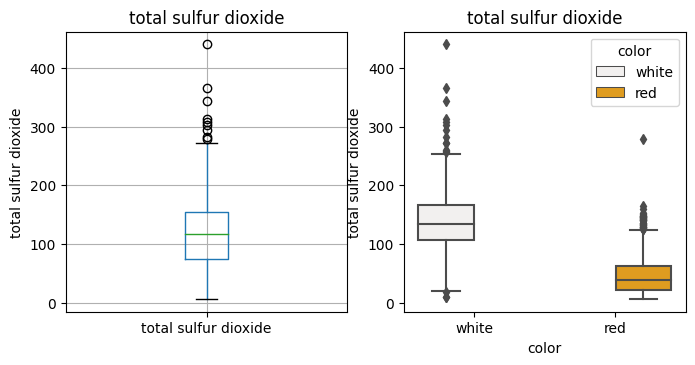

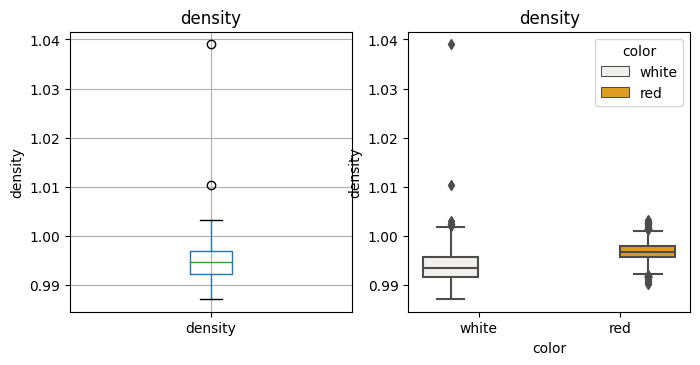

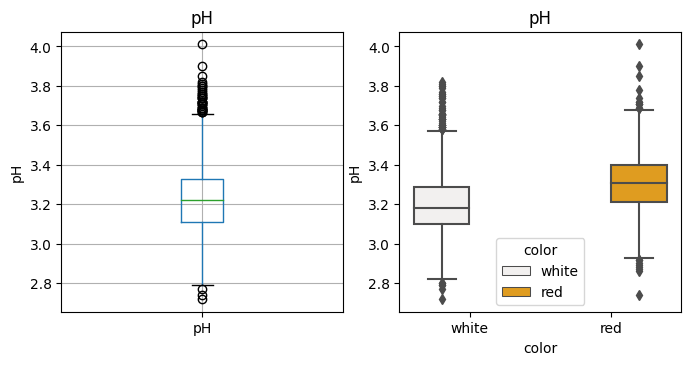

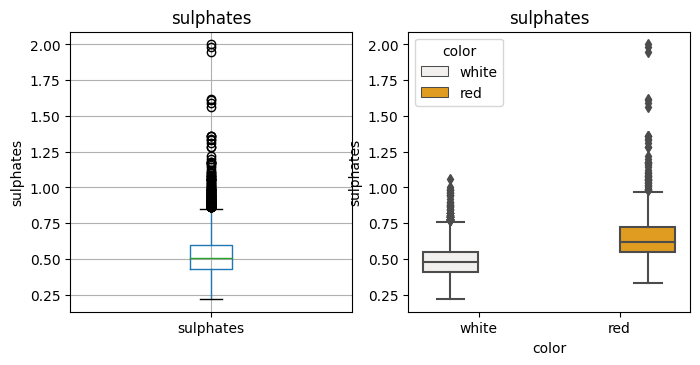

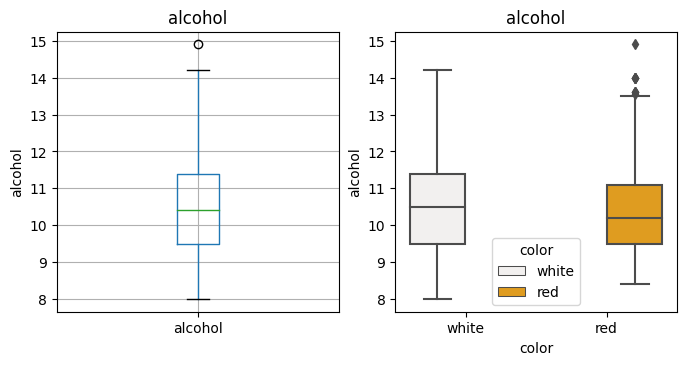

In [ ]:
create_boxplots(df_train, continuous_features, 'color')

In [ ]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
        lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
        upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
        dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
        dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

In [ ]:
remove_outliers(df_train, continuous_features)

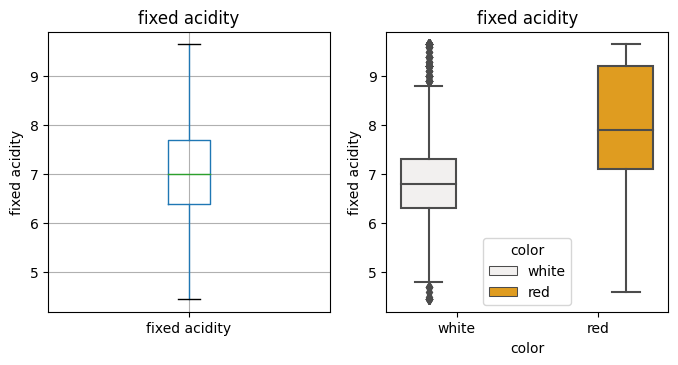

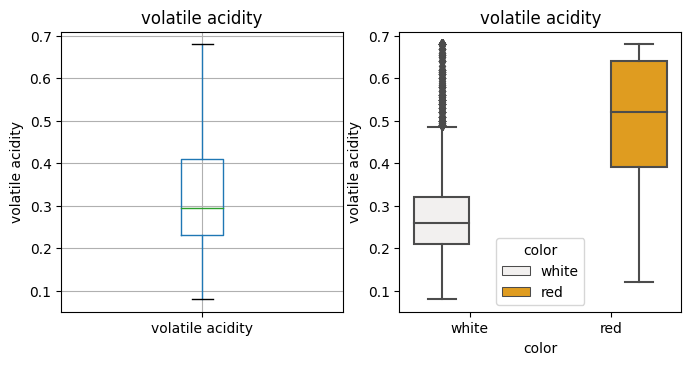

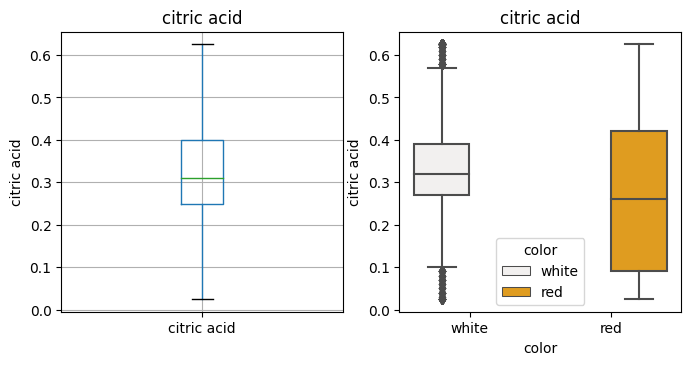

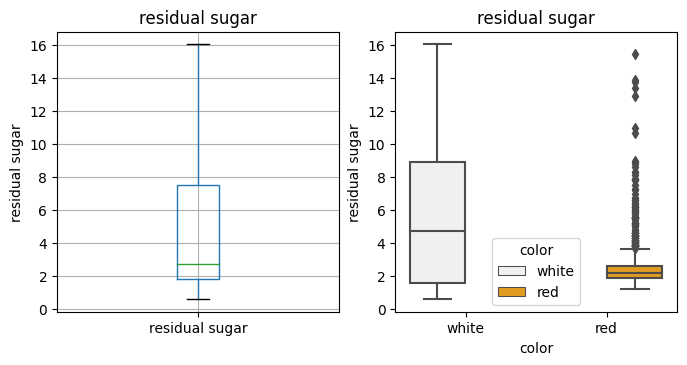

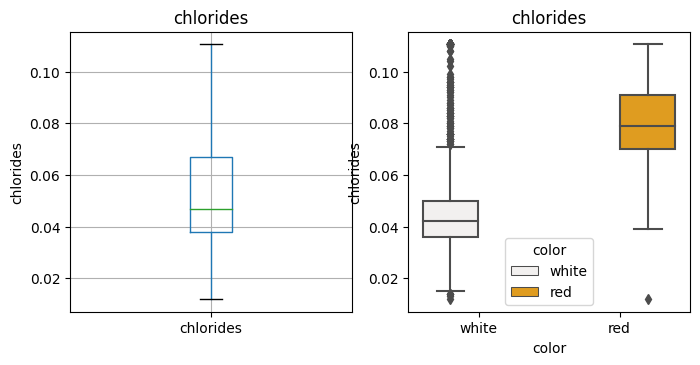

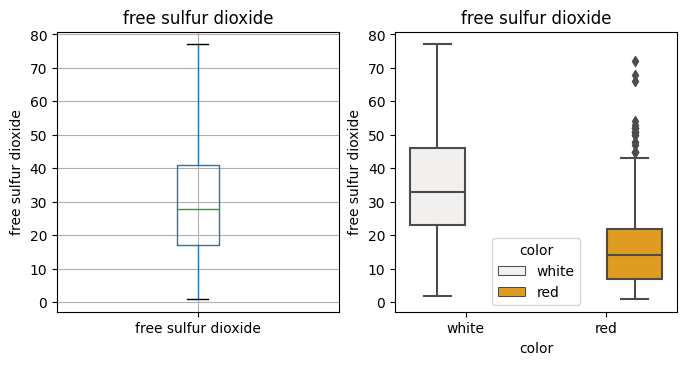

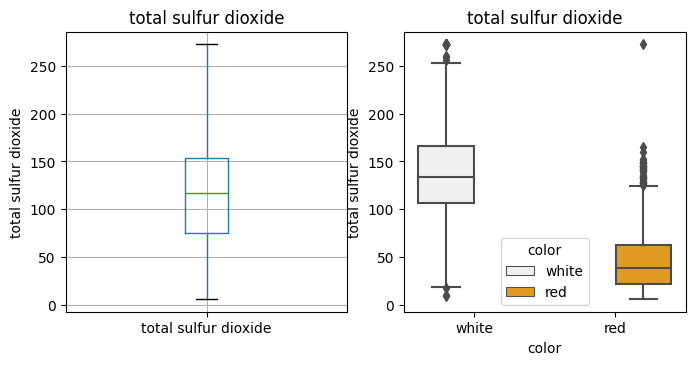

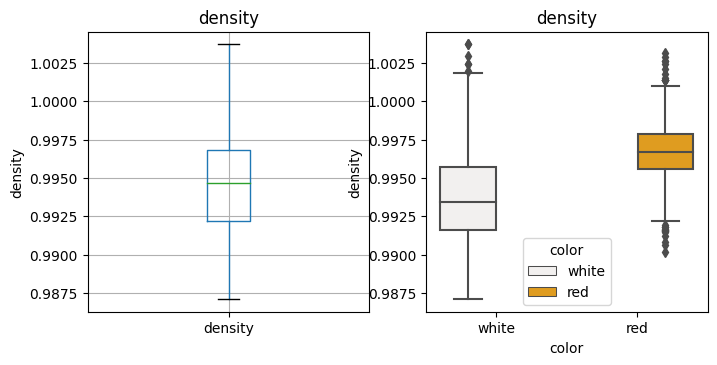

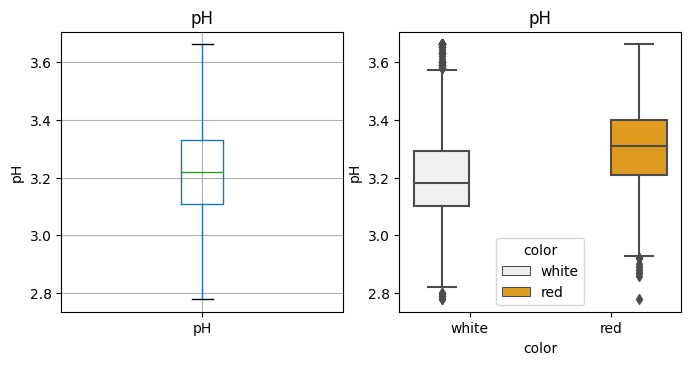

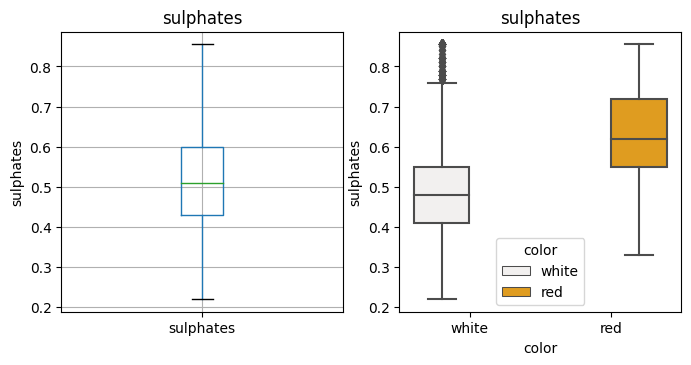

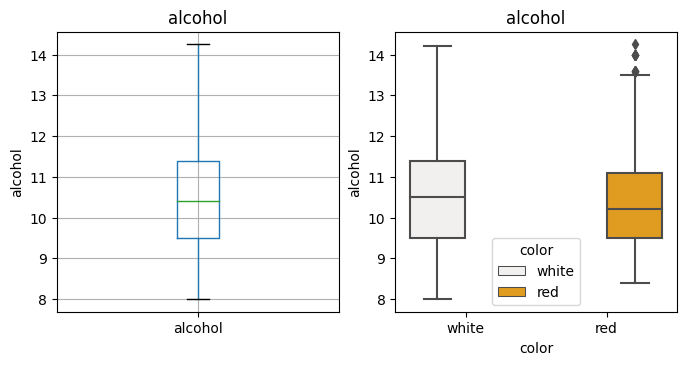

In [ ]:
create_boxplots(df_train, continuous_features, 'color')

From the boxplots, it can be observed that all the continuous features have univariate outliers

## Plotting histograms and distplots to check the distributions of continuous variables

In [ ]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(8,8))
        plt.subplot(2,2,1)
        plt.ticklabel_format(style='plain')
        plt.hist(dataset[feature].dropna())
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        plt.ticklabel_format(style='plain')
        sns.distplot(dataset[feature])
        plt.xlabel(feature)
        plt.show()

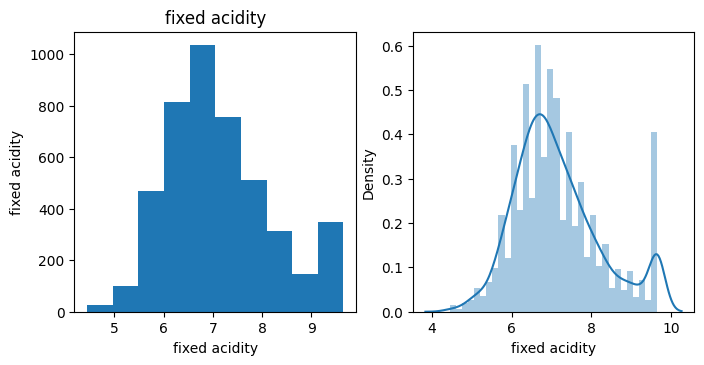

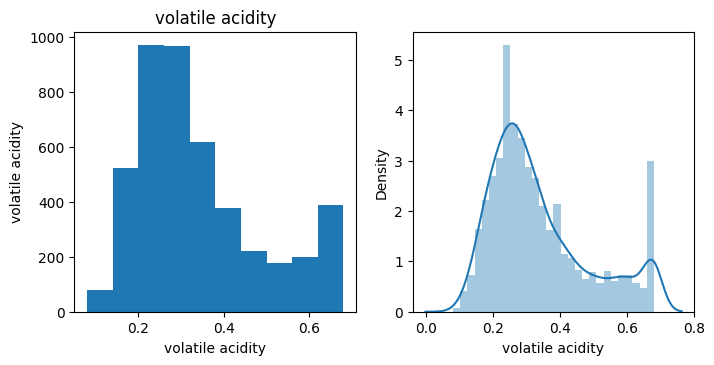

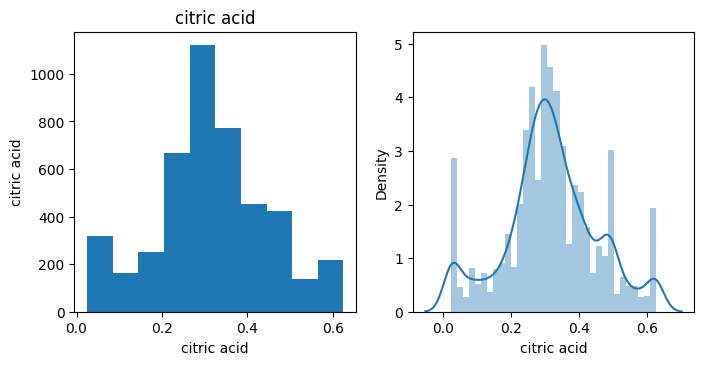

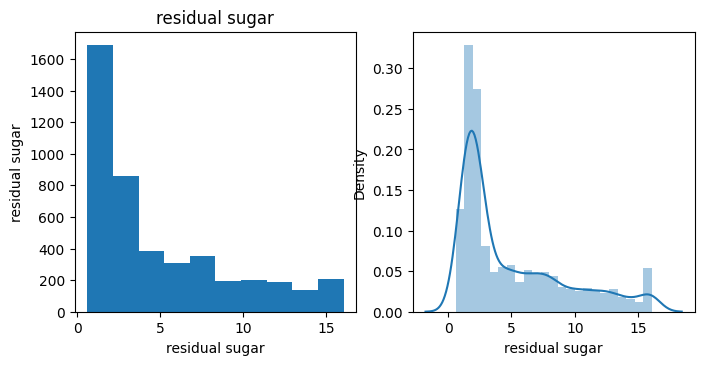

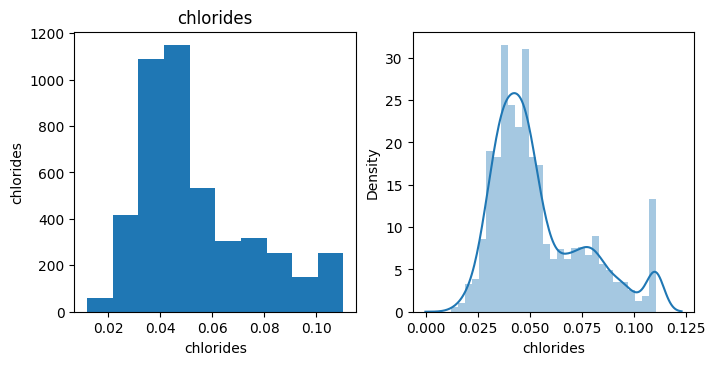

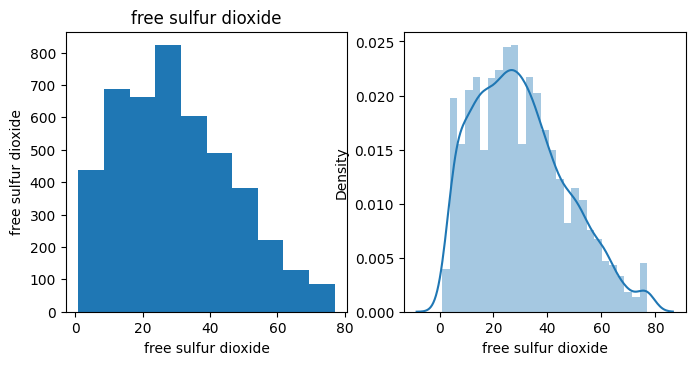

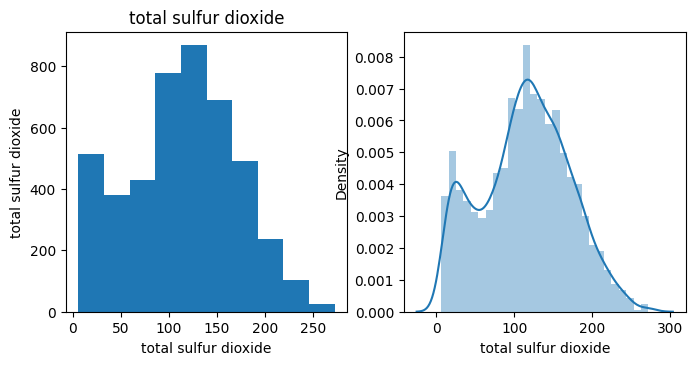

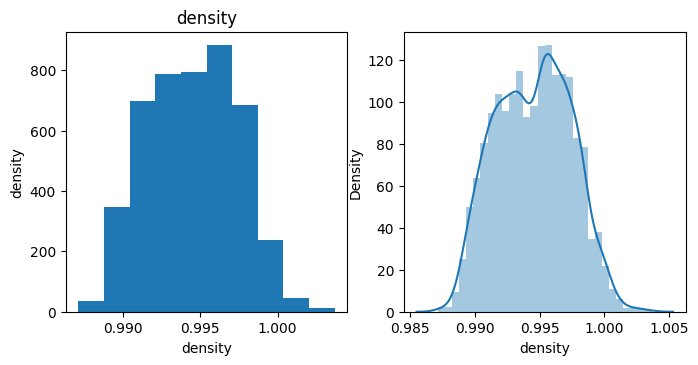

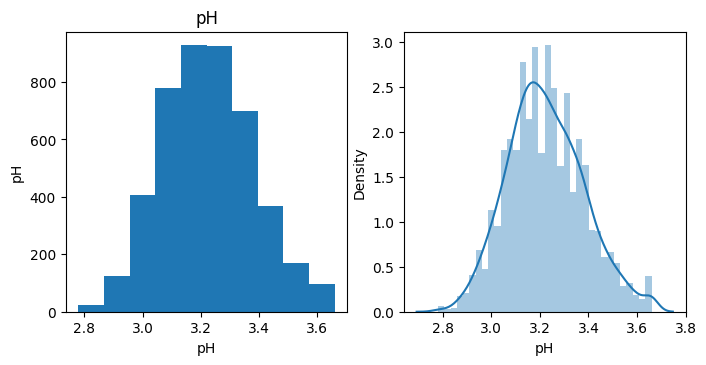

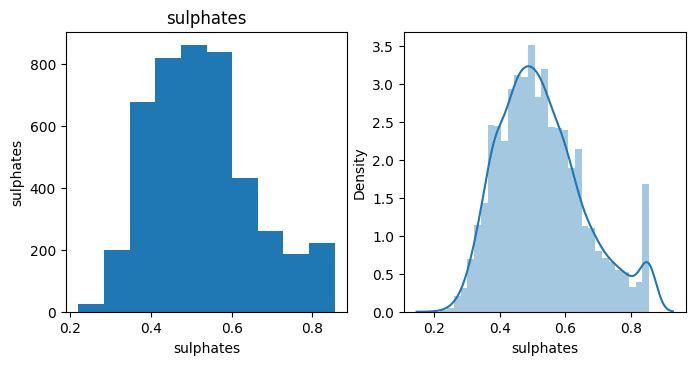

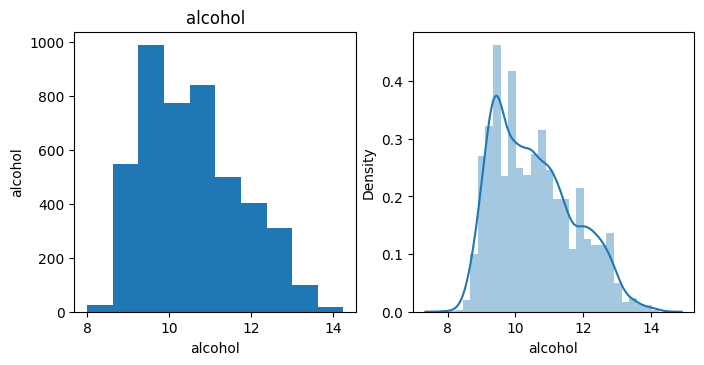

In [ ]:
create_histograms_distplots(df_train, continuous_features)

From the distplots, it can be observed that the feature columns **volatile acidity**, **residual sugar**, **free sulfur dioxide**, **sulphates**, **chlorides** and **alcohol** are considerably skewed. We will remove skewness by performing square root transformation

**Checking skewness scores to determine skewness in the column**

In [ ]:
from scipy.stats import skew

In [ ]:
def skewness_score(dataset, feature_list):
    variables = []
    skew_scores = []
    transformed_skew_scores = []
    for feature in feature_list:
        variables.append(feature)
        skew_scores.append(skew(dataset[feature]))
        if (float(skew(dataset[feature])) >= 0.6) | (float(skew(dataset[feature])) <= -0.6):
          dataset[feature] = np.sqrt(dataset[feature])
        transformed_skew_scores.append(skew(dataset[feature]))
        skew_dict = {'Feature': variables, 'Skewness Score before transformation': skew_scores, 'Skewness score after square root transformation of skewed features': transformed_skew_scores}
        skewness_score = pd.DataFrame(skew_dict)
    return skewness_score

In [ ]:
skewness_score(df_train, continuous_features)

Feature  Skewness Score before transformation  \
0          fixed acidity                              0.650615   
1       volatile acidity                              0.927973   
2            citric acid                             -0.004484   
3         residual sugar                              1.151167   
4              chlorides                              0.987667   
5    free sulfur dioxide                              0.541640   
6   total sulfur dioxide                             -0.003064   
7                density                              0.022730   
8                     pH                              0.273356   
9              sulphates                              0.613810   
10               alcohol                              0.527043   

    Skewness score after square root transformation of skewed features  
0                                            0.461031                   
1                                            0.574892                   
2                                           -0.004484                   
3                                            0.734937                   
4                                            0.618143                   
5                                            0.541640                   
6                                           -0.003064                   
7                                            0.022730                   
8                                            0.273356                   
9                                            0.327175                   
10                                           0.527043

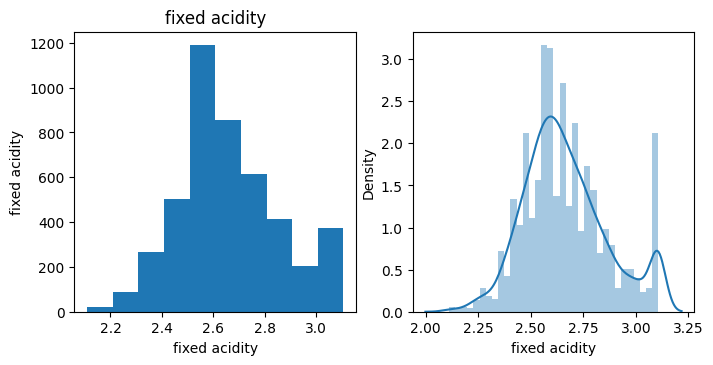

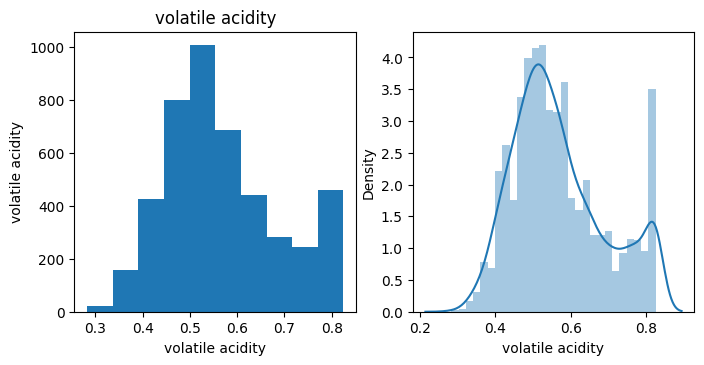

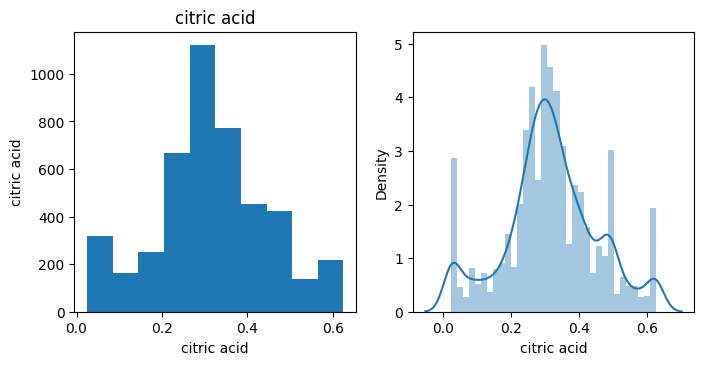

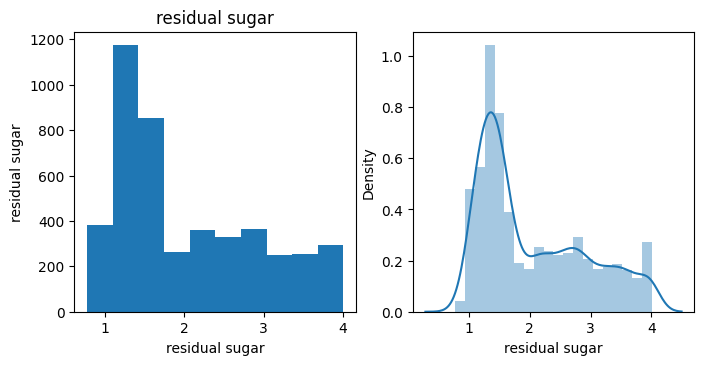

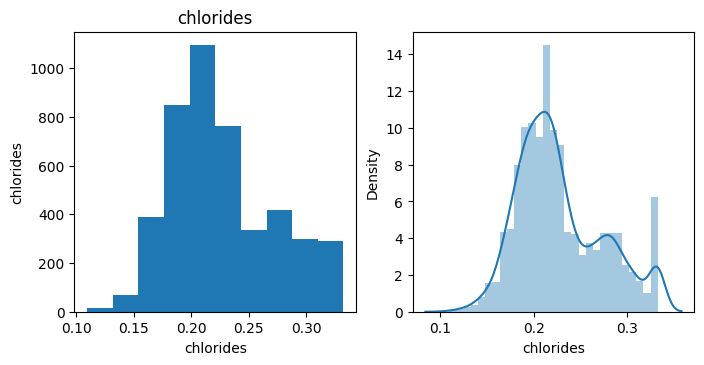

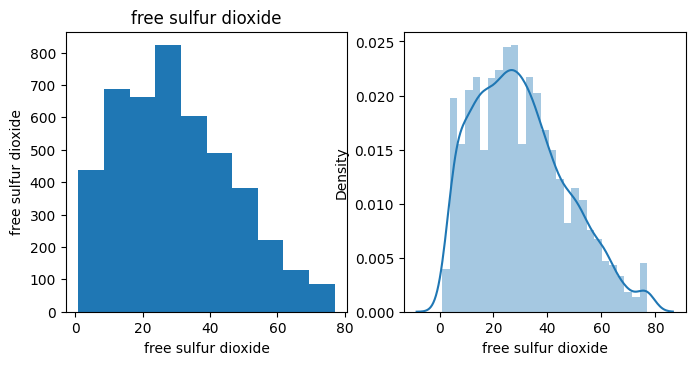

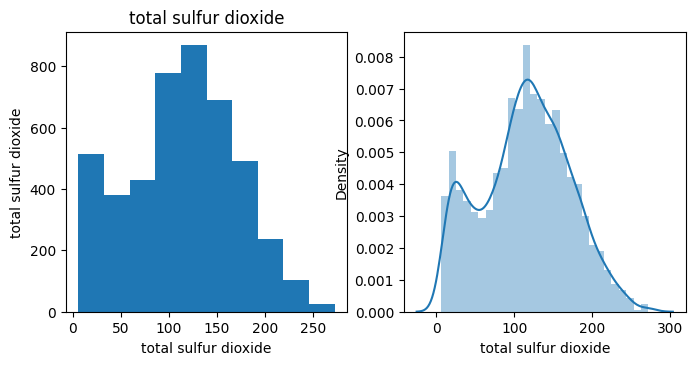

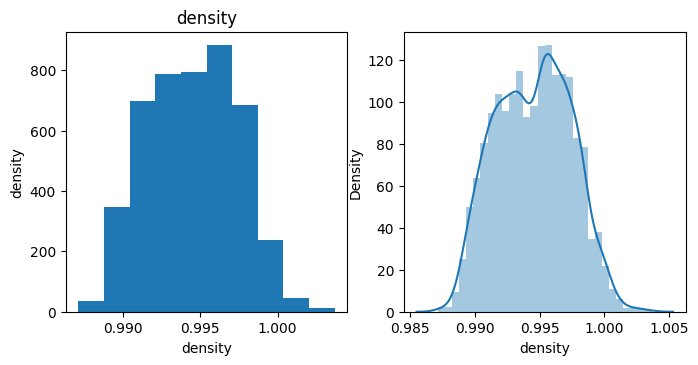

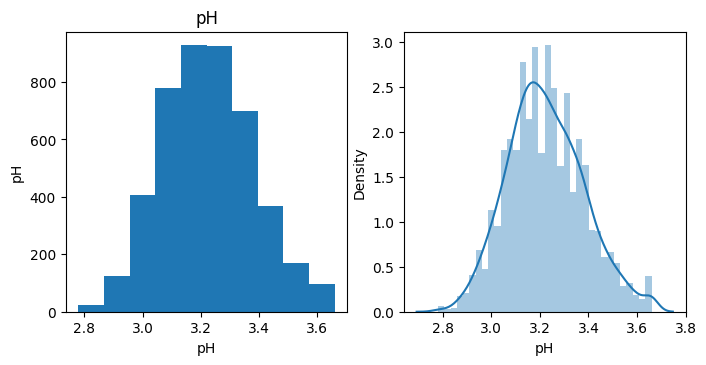

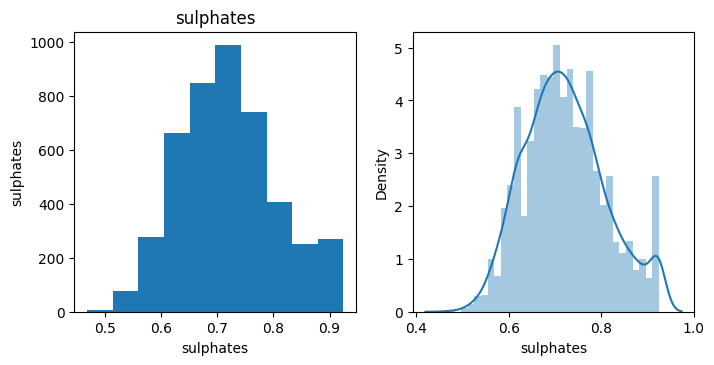

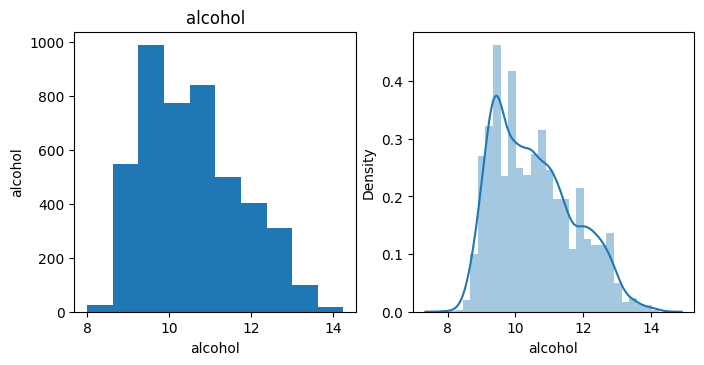

In [ ]:
create_histograms_distplots(df_train, continuous_features)

It can be observed that the skewness has been handled

## Plotting scatterplot to identify any multivariate outliers

In [ ]:
def create_scatterplots(dataset, feature_list):
    for feature in feature_list:
        for bivariate_feature in feature_list:
            if feature != bivariate_feature:
                sns.lmplot(x=feature, y=bivariate_feature, data=dataset, fit_reg=False, hue='color')

In [ ]:
#create_scatterplots(dataset=df_train, feature_list=continuous_features)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] > 2.9) & (df_train['volatile acidity'] < 0.35)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] > 2.6) & (df_train['volatile acidity'] < 0.3)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.47) & (df_train['volatile acidity'] < 0.46) & (df_train['color'] == 'red')].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.67) & (df_train['volatile acidity'] < 0.41) & (df_train['color'] == 'red')].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] > 3.08) & (df_train['volatile acidity'] > 0.63) & (df_train['color'] == 'white')].index)

In [ ]:

df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.24) & (df_train['citric acid'] > 0.49) & (df_train['color'] == 'red')].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.42) & (df_train['citric acid'] > 0.62) & (df_train['color'] == 'red')].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.17) & (df_train['citric acid'] < 0.18) & (df_train['color'] == 'red')].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.37) & (df_train['citric acid'] > 0.36) & (df_train['color'] == 'red')].index)

In [ ]:
#Color
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.4) & (df_train['citric acid'] > 0.2) & (df_train['color'] == 'red')].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.11) & (df_train['residual sugar'] > 3.2)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.25) & (df_train['residual sugar'] > 4)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.31) & (df_train['chlorides'] > 0.33)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] > 3) & (df_train['free sulfur dioxide'] < 1.1)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] > 3.05) & (df_train['free sulfur dioxide'] > 75)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.2) & (df_train['total sulfur dioxide'] < 11)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] > 3) & (df_train['total sulfur dioxide'] > 270)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.11) & (df_train['density'] > 0.9950)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.11) & (df_train['sulphates'] > 0.9)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] > 3.1) & (df_train['alcohol'] > 14)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.2) & (df_train['alcohol'] < 2.9)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] > 0.75) & (df_train['chlorides'] < 0.15)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] > 0.56) & (df_train['volatile acidity'] < 0.58) & (df_train['density'] > 1.003)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] < 0.35) & (df_train['pH'] < 2.81)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] < 0.46) & (df_train['sulphates'] < 0.51)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] < 0.29) & (df_train['sulphates'] > 0.82)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] > 0.81) & (df_train['sulphates'] < 0.53)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['citric acid'] < 0.026) & (df_train['chlorides'] < 0.14)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['citric acid'] > 0.59) & (df_train['density'] > 1.0036)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['citric acid'] < 0.26) & (df_train['sulphates'] < 0.48)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['residual sugar'] > 3.8) & (df_train['total sulfur dioxide'] < 42)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['residual sugar'] > 3.7) & (df_train['pH'] < 2.8)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['chlorides'] < 0.13) & (df_train['fixed acidity'] < 2.22)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['chlorides'] > 0.28) & (df_train['total sulfur dioxide'] > 272)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['chlorides'] < 0.18) & (df_train['density'] > 1.002)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['chlorides'] < 0.13) & (df_train['pH'] < 2.9)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['chlorides'] > 0.33) & (df_train['pH'] > 3.65)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['chlorides'] > 0.33) & (df_train['pH'] < 2.8)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['free sulfur dioxide'] > 76) & (df_train['density'] > 1.002)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] < 24) & (df_train['density'] > 1.003)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] > 272) & (df_train['density'] < 0.991)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] > 271) & (df_train['pH'] > 3.4)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] < 41) & (df_train['pH'] < 2.8)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] > 242) & (df_train['sulphates'] > 0.88)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] > 272) & (df_train['sulphates'] < 0.61)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] > 272) & (df_train['alcohol'] > 12.2)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] > 215) & (df_train['alcohol'] > 13)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] > 158) & (df_train['alcohol'] < 8.1)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['density'] < 0.988) & (df_train['sulphates'] > 0.91)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['density'] > 1) & (df_train['alcohol'] > 12.6)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['pH'] < 2.8) & (df_train['volatile acidity'] > 0.69)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['sulphates'] > 0.8) & (df_train['chlorides'] < 0.119)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['residual sugar'] > 1.54) & (df_train['chlorides'] < 0.11)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['free sulfur dioxide'] > 22) & (df_train['density'] > 1.0028)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['free sulfur dioxide'] < 13.1) & (df_train['pH'] < 2.8)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['free sulfur dioxide'] > 51) & (df_train['fixed acidity'] < 2.11)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['chlorides'] < 0.12) & (df_train['volatile acidity'] > 0.66)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['chlorides'] > 0.3) & (df_train['volatile acidity'] < 0.38)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['free sulfur dioxide'] > 65) & (df_train['volatile acidity'] > 0.77)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['citric acid'] < 0.11) & (df_train['density'] < 0.989)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['citric acid'] > 0.38) & (df_train['fixed acidity'] < 2.11)].index)

In [ ]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] < 66) & (df_train['fixed acidity'] < 2.15)].index)

## Plotting Hexplot to check the concentration of data points

In [ ]:
def create_jointplots(dataset, feature_list):
    plt.figure(figsize=(5,5))
    for feature in feature_list:
        for bivariate_feature in feature_list:
            if feature != bivariate_feature:
                sns.jointplot(x=feature, y=bivariate_feature, data=dataset, kind='hex')

In [ ]:
#Fcreate_jointplots(df_wine, continuous_features)

Darker regions in the **hexplot** mean more concentration of data points in those regions

## Plotting FacetGrids

In [ ]:
def create_FacetGrid(dataset, feature_list):
    for feature in feature_list:
        v = sns.FacetGrid(dataset, col='color', row='quality')
        v.map(plt.hist, feature)

In [ ]:
#create_FacetGrid(df_wine, continuous_features)

## Creating Pivot table

In [ ]:
pd.pivot_table(df_train, index='color', values=continuous_features, aggfunc=['median'])

median                                                \
      alcohol chlorides citric acid   density fixed acidity   
color                                                         
red     10.15  0.281069        0.26  0.996720      2.810694   
white   10.40  0.207364        0.32  0.993475      2.607681   

                                                                               \
      free sulfur dioxide    pH residual sugar sulphates total sulfur dioxide   
color                                                                           
red                  14.0  3.31       1.483240  0.787401                 38.0   
white                33.0  3.18       2.167948  0.692820                134.0   

                        
      volatile acidity  
color                   
red           0.721110  
white         0.509902

It can be observed that **white** wine has a much higher median concentration of **free sulfur dioxide** and **total sulfur dioxide** than **red** wine

In [ ]:
pd.pivot_table(df_train, index='quality', values=continuous_features, aggfunc='median')

alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                             
3         10.025   0.241848        0.345  0.995900       2.747711   
4         10.050   0.228035        0.260  0.995060       2.626785   
5          9.600   0.230217        0.300  0.995945       2.664583   
6         10.500   0.214476        0.310  0.994500       2.626785   
7         11.500   0.197484        0.320  0.992140       2.607681   
8         12.200   0.192354        0.330  0.991800       2.626785   
9         12.600   0.160491        0.350  0.990050       2.645684   

         free sulfur dioxide     pH  residual sugar  sulphates  \
quality                                                          
3                       15.5  3.245        1.663574   0.717627   
4                       14.0  3.240        1.483240   0.707107   
5                       27.0  3.200        1.658244   0.714143   
6                       29.0  3.220        1.673320   0.721110   
7                       29.0  3.240        1.612452   0.721110   
8                       32.0  3.240        1.897367   0.700000   
9                       29.0  3.325        1.448727   0.670447   

         total sulfur dioxide  volatile acidity  
quality                                          
3                        61.5          0.643912  
4                       101.5          0.608221  
5                       125.0          0.574456  
6                       117.0          0.519615  
7                       113.0          0.529150  
8                       114.0          0.533854  
9                       116.0          0.554951

The above pivot table shows the concentration of various constituents in wines of respective quality values

In [ ]:
df_train.groupby(['quality', 'color'])[['color']].count().sort_values(['quality']).rename(columns={'color':'Count'})

Count
quality color       
3       red        9
        white     15
4       red       44
        white    126
5       red      479
        white    975
6       red      449
        white   1503
7       red      135
        white    576
8       red       14
        white    105
9       white      4

<Axes: xlabel='quality,color'>

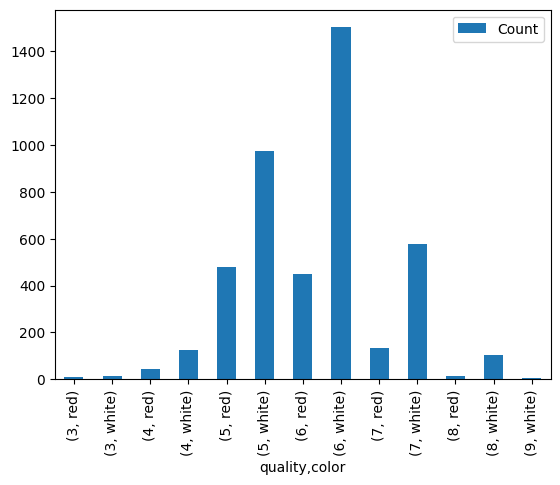

In [ ]:
df_train.groupby(['quality', 'color'])[['color']].count().sort_values(['quality']).rename(columns={'color':'Count'}).plot(kind='bar')

The **white** wine with wuality **6** is the maximum in count wherea the **white** wines with quality **9** is minimum in count

## Plotting a Heatmap for correlation analysis

<Axes: >

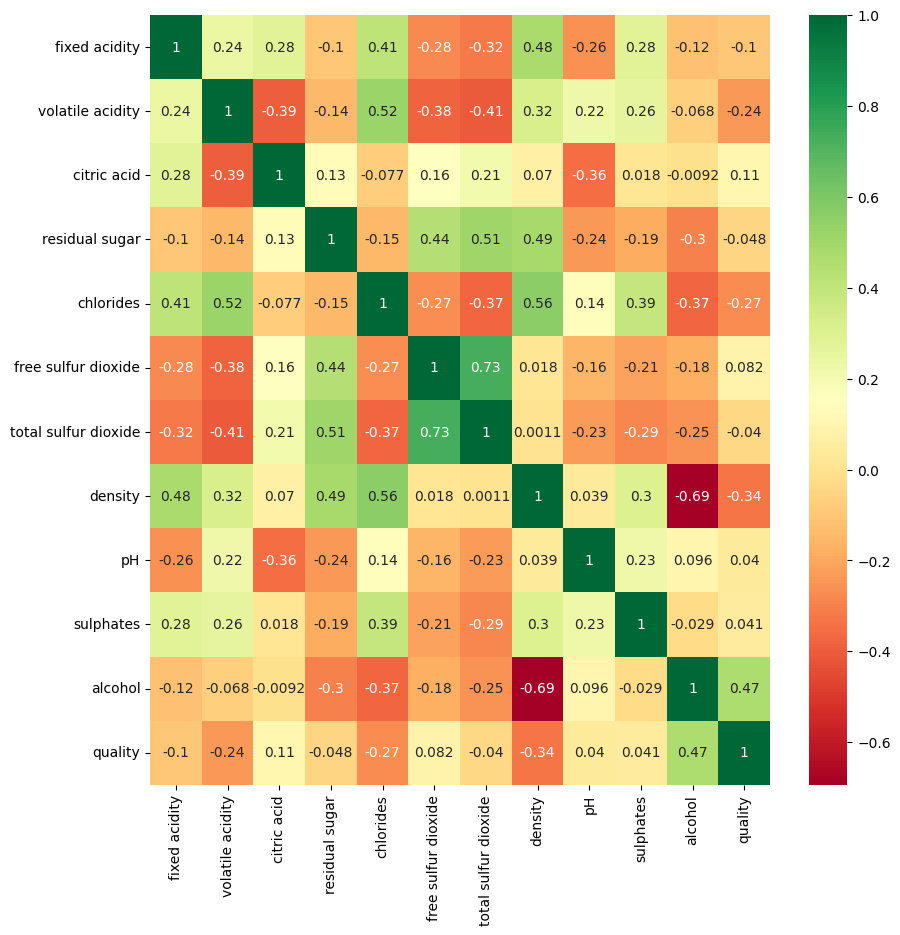

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True, cmap="RdYlGn")

The correlation analysis using heatmap shows values of pearson correlation coefficient for the respective combinations of the features. The pearson correlation coefficient varies from -1 to 1. The stronger the negative value, the more inversely related are the features. The stronger the positive value, the stronger the direct relationship between the features. A value of zero means the features are independent of each other.

The correlation analysis will have effect on the feature selection. The combination of features which are strongly and directly related to each other need to be considered. One of such features can be dropped as all of such features will have the same impact on the target feature.

## Feature Selection

**Feature Selection** is performed to retain only the important features and discard the irrelevant features

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = df_train.iloc[:,:-1]

In [ ]:
X.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       2.683282          0.591608        0.250        2.366432   0.178885   
1       2.213594          0.648074        0.025        1.449138   0.219089   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 23.0                 120.0  0.99334  2.93   0.812404   
1                 16.0                  42.0  0.99154  3.66   0.860233   

   alcohol  quality  
0     10.3        7  
1     14.0        7

In [ ]:
Y = df_train.iloc[:,-1]

In [ ]:
Y.head(2)

0    white
1      red
Name: color, dtype: object

In [ ]:
bestfeatures = SelectKBest(score_func = chi2)

In [ ]:
fit = bestfeatures.fit(X, Y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

In [ ]:
featureScores.columns = ['Features', 'Score']

In [ ]:
featureScores.sort_values(by='Score', ascending=False)

Features         Score
6   total sulfur dioxide  61968.885635
5    free sulfur dioxide  10049.252025
3         residual sugar    186.387229
1       volatile acidity     51.539027
4              chlorides     20.079807
0          fixed acidity     15.264991
9              sulphates     11.928271
2            citric acid     11.839047
11               quality      8.225955
8                     pH      3.169169
10               alcohol      2.476399
7                density      0.007279

The features that have high scores are more correlated with the target variable.

The features **density**, **alcohol**, **pH** and **quality** do not contribute much to the prediction of the target variable

## Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model = ExtraTreesClassifier()

In [ ]:
model.fit(X,Y)

ExtraTreesClassifier()

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

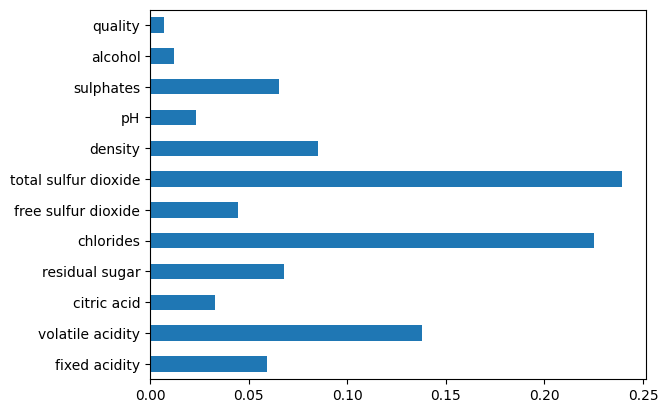

In [ ]:
feat_importances.plot(kind='barh')
plt.show()

The above barplot displays the feature importance scores. From the above barplot, it can be observed that the features **quality**, **alcohol** and **pH** are not so important features and thus can be removed from the dataset

In [ ]:
df_train = df_train.drop(['pH', 'alcohol', 'quality'], axis = 1)

In [ ]:
df_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       2.683282          0.591608        0.250        2.366432   0.178885   
1       2.213594          0.648074        0.025        1.449138   0.219089   
2       3.106445          0.655744        0.330        1.643168   0.308221   
3       2.529822          0.469042        0.560        3.807887   0.234521   
4       2.828427          0.469042        0.320        3.224903   0.207364   

   free sulfur dioxide  total sulfur dioxide  density  sulphates  color  
0                 23.0                 120.0  0.99334   0.812404  white  
1                 16.0                  42.0  0.99154   0.860233    red  
2                 28.0                  89.0  0.99840   0.824621    red  
3                 27.0                 159.0  0.99800   0.632456  white  
4                 63.0                 201.0  0.99700   0.728011  white

The features **quality**, **alcohol** and **pH** have been removed from the training and testing dataframes

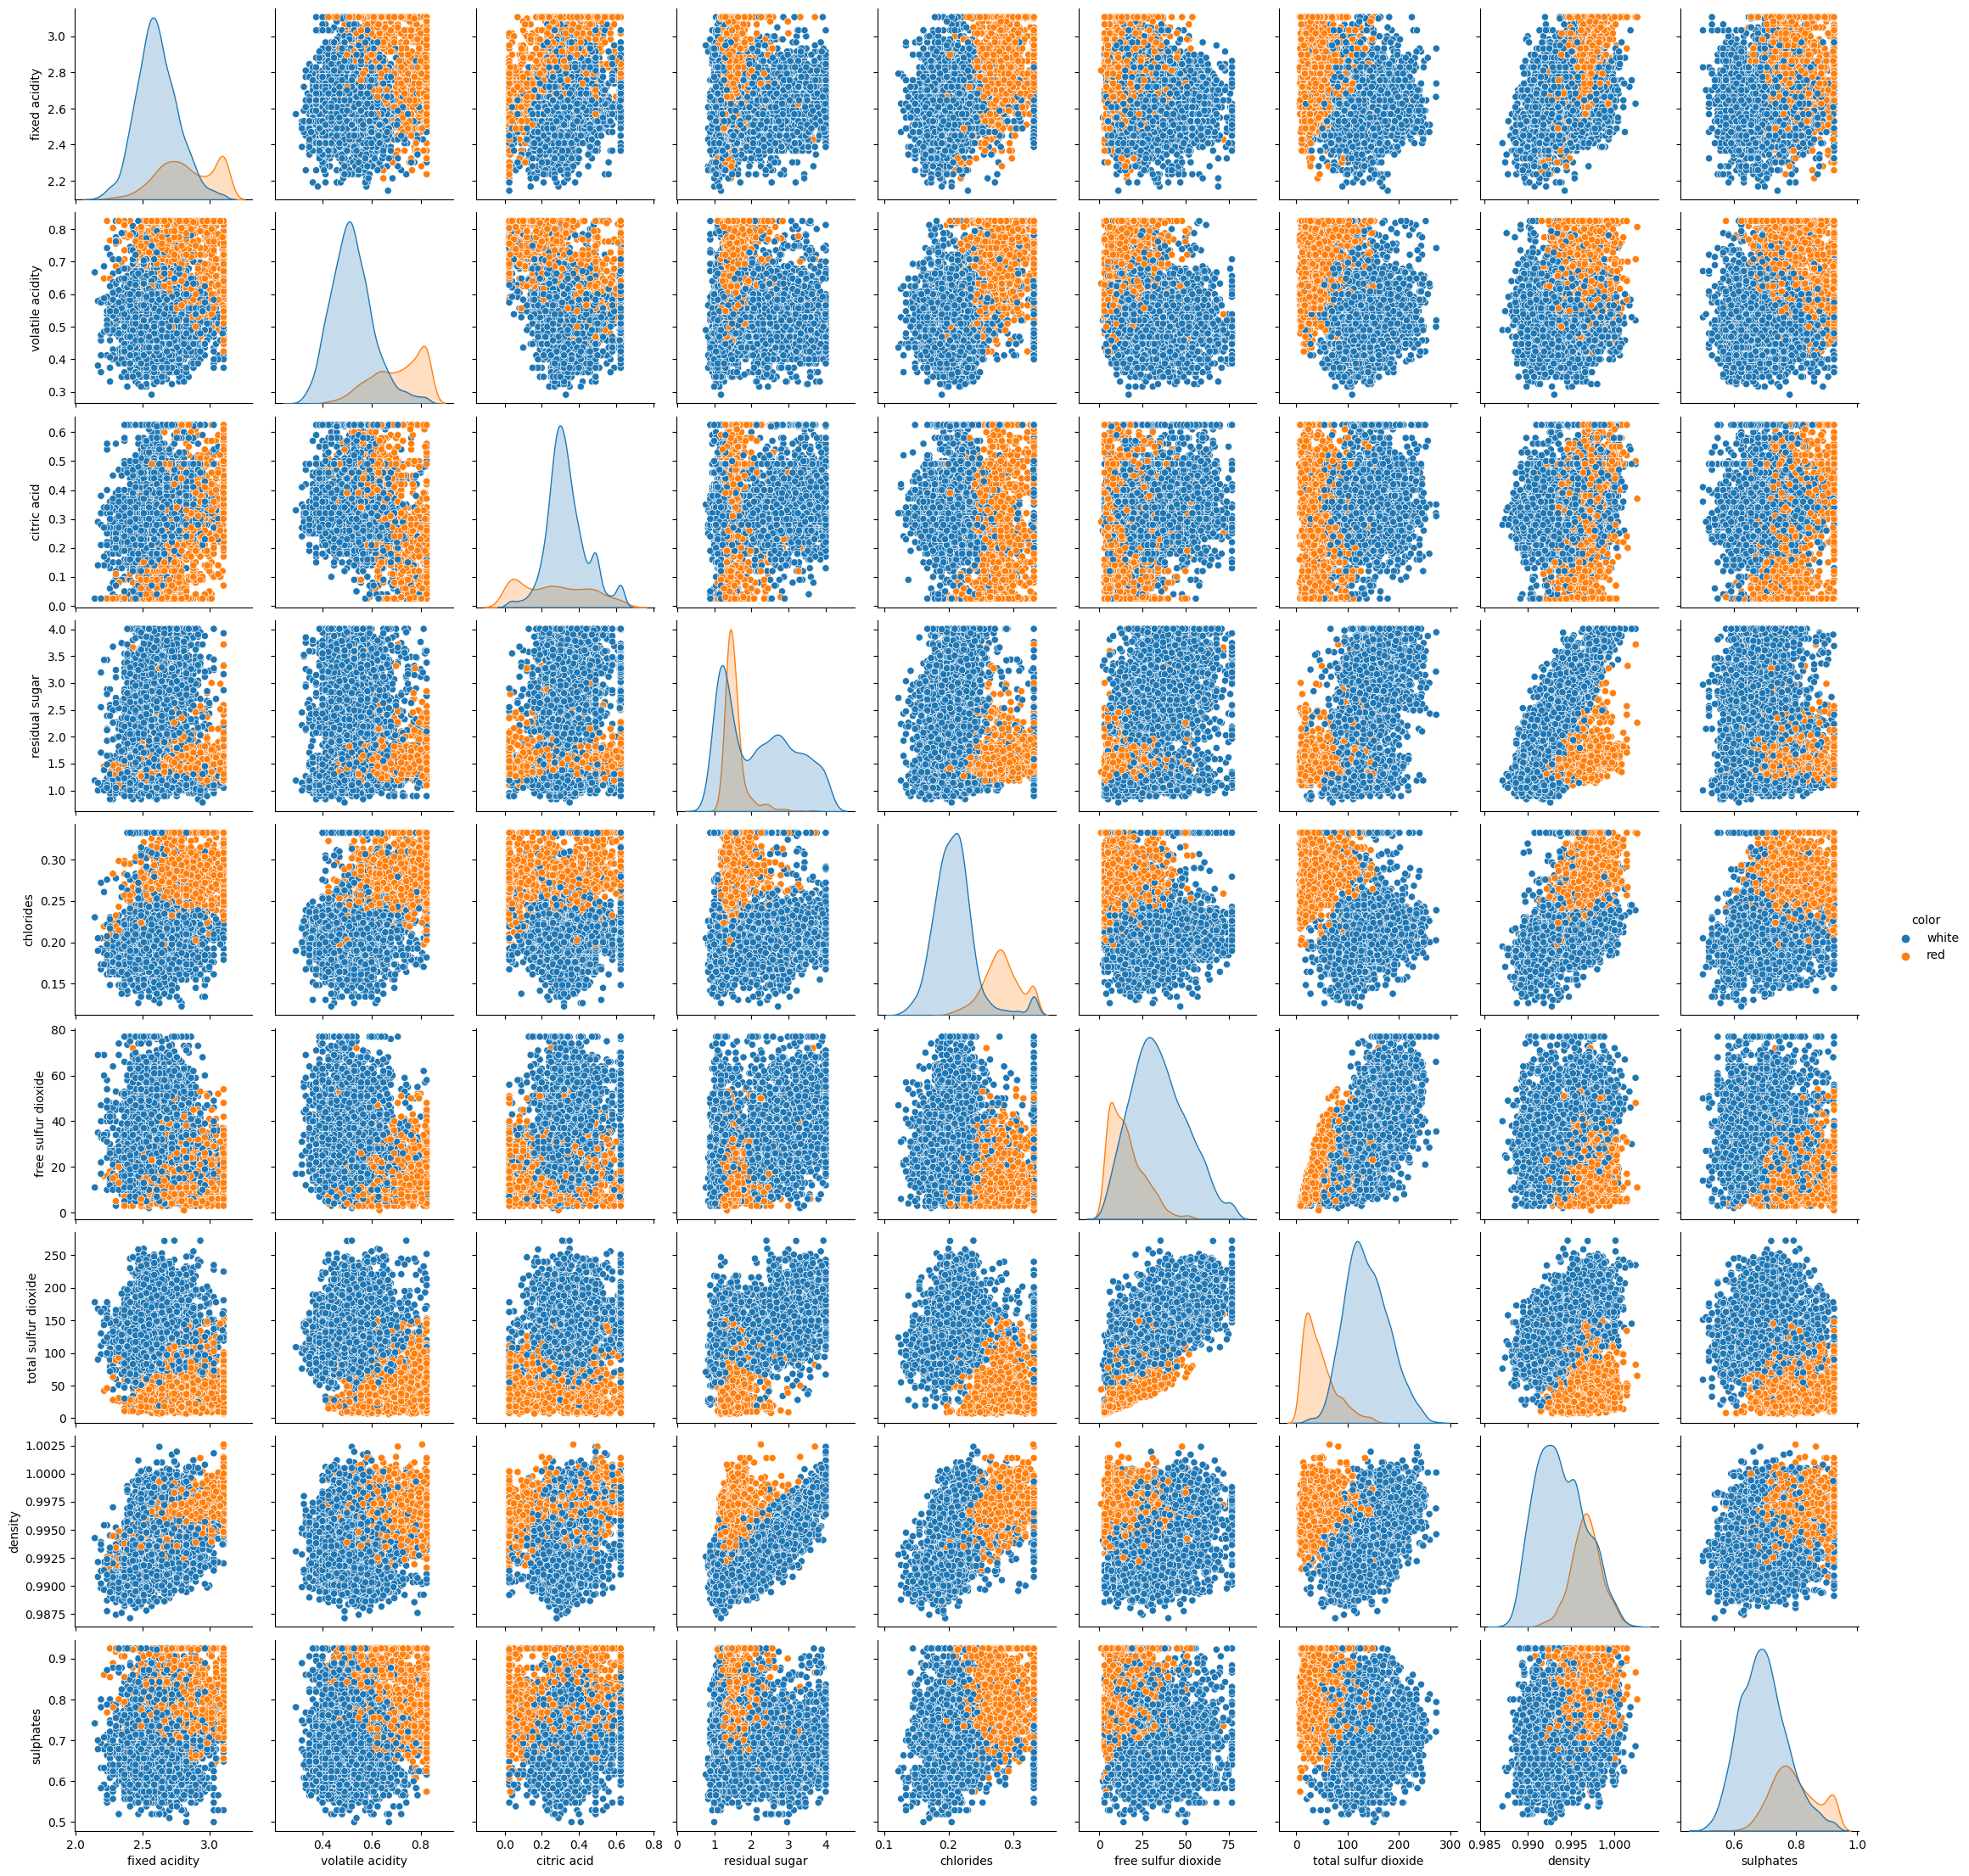

In [ ]:
sns.pairplot(df_train, hue='color')

## Handling imbalance in the data

In [ ]:
from collections import Counter

In [ ]:
print(df_train['color'].value_counts())

white    3304
red      1130
Name: color, dtype: int64


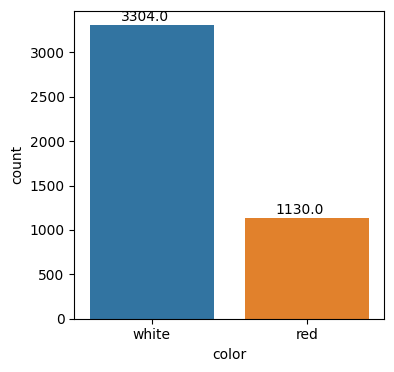

In [ ]:
plt.figure(figsize=(4,4))
plt.ticklabel_format(style='plain')
ax = sns.countplot(x= 'color', data=df_train)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))

It can be observed that there is a huge imbalance in the target column **color** in the dataset

In [ ]:
# Installing imblearn library
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline

In [ ]:
# Initializing SMOTE
#over = SMOTE(sampling_strategy=0.6, random_state=2)
#under = RandomUnderSampler(sampling_strategy=1)
#sm = SMOTEENN(random_state=2)
smt = SMOTETomek(random_state=139)

In [ ]:
X = df_train.iloc[:,:-1]

In [ ]:
Y = df_train.iloc[:,-1]

In [ ]:
X_train, Y_train = smt.fit_resample(X, Y)

In [ ]:
print("Number of classes after fit {}".format(Counter(Y_train)))

Number of classes after fit Counter({'white': 3224, 'red': 3224})


In [ ]:
df_train = X_train.join(Y_train, how='inner')

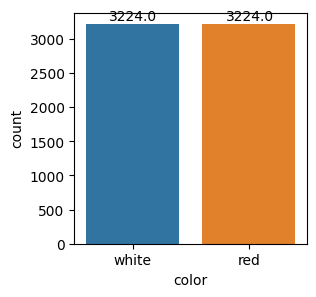

In [ ]:
plt.figure(figsize=(3,3))
plt.ticklabel_format(style='plain')
ax = sns.countplot(x= 'color', data=df_train)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))

In [ ]:
sns.pairplot(df_train, hue='color')

In [ ]:
df_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       2.683282          0.591608        0.250        2.366432   0.178885   
1       2.213594          0.648074        0.025        1.449138   0.219089   
2       3.106445          0.655744        0.330        1.643168   0.308221   
3       2.529822          0.469042        0.560        3.807887   0.234521   
4       2.828427          0.469042        0.320        3.224903   0.207364   

   free sulfur dioxide  total sulfur dioxide  density  sulphates  color  
0                 23.0                 120.0  0.99334   0.812404  white  
1                 16.0                  42.0  0.99154   0.860233    red  
2                 28.0                  89.0  0.99840   0.824621    red  
3                 27.0                 159.0  0.99800   0.632456  white  
4                 63.0                 201.0  0.99700   0.728011  white

#### One hot encoding of color feature

In [ ]:
df_train = pd.get_dummies(df_train, drop_first=True)

In [ ]:
df_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       2.683282          0.591608        0.250        2.366432   0.178885   
1       2.213594          0.648074        0.025        1.449138   0.219089   
2       3.106445          0.655744        0.330        1.643168   0.308221   
3       2.529822          0.469042        0.560        3.807887   0.234521   
4       2.828427          0.469042        0.320        3.224903   0.207364   

   free sulfur dioxide  total sulfur dioxide  density  sulphates  color_white  
0                 23.0                 120.0  0.99334   0.812404            1  
1                 16.0                  42.0  0.99154   0.860233            0  
2                 28.0                  89.0  0.99840   0.824621            0  
3                 27.0                 159.0  0.99800   0.632456            1  
4                 63.0                 201.0  0.99700   0.728011            1

The target variable **color** has been one hot encoded

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Instantiating MinMaxScaler
minmax_scaler  = MinMaxScaler()

In [ ]:
#Fitting the dataframe X_train onto the MinMaxScaler
df_train_continuous_features_transformed = minmax_scaler.fit_transform(df_train)

In [ ]:
df_train_continuous_features_transformed

array([[0.55997666, 0.56288742, 0.375     , ..., 0.40219496, 0.73565275,
        1.        ],
       [0.07157581, 0.66881294, 0.        , ..., 0.28599096, 0.84828038,
        0.        ],
       [1.        , 0.68320079, 0.50833333, ..., 0.72885733, 0.76442217,
        0.        ],
       ...,
       [0.49867126, 0.99852995, 0.        , ..., 0.61606157, 0.63235188,
        0.        ],
       [0.66098468, 0.40957476, 0.52895596, ..., 0.59181769, 0.79159549,
        0.        ],
       [0.80741597, 0.85963324, 0.83805887, ..., 0.64941325, 0.63695063,
        0.        ]])

In [ ]:
df_train_continuous_features_scaled = pd.DataFrame(df_train_continuous_features_transformed, columns=df_train.columns)

In [ ]:
df_train_continuous_features_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.559977          0.562887     0.375000        0.492577   0.268699   
1       0.071576          0.668813     0.000000        0.208730   0.460199   
2       1.000000          0.683201     0.508333        0.268770   0.884755   
3       0.400403          0.332963     0.891667        0.938620   0.533704   
4       0.710905          0.332963     0.491667        0.758222   0.404352   

   free sulfur dioxide  total sulfur dioxide   density  sulphates  color_white  
0             0.289474              0.427767  0.402195   0.735653          1.0  
1             0.197368              0.135084  0.285991   0.848280          0.0  
2             0.355263              0.311445  0.728857   0.764422          0.0  
3             0.342105              0.574109  0.703034   0.311908          1.0  
4             0.815789              0.731707  0.638476   0.536923          1.0

## Data Preprocessing and cleaning on the test dataframe

Checking for missing values in the test dataframe

In [ ]:
df_test.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

It can be observed that there are no missing values in the test dataframe

**Treating univariate outliers in the test dataframe**

In [ ]:
remove_outliers(df_test, continuous_features)

**Handling skewness in the test dataframe**

In [ ]:
skewness_score(df_test, continuous_features)

Feature  Skewness Score before transformation  \
0          fixed acidity                              0.561244   
1       volatile acidity                              0.885039   
2            citric acid                             -0.000180   
3         residual sugar                              1.122187   
4              chlorides                              0.899837   
5    free sulfur dioxide                              0.486580   
6   total sulfur dioxide                              0.019466   
7                density                              0.034694   
8                     pH                              0.229831   
9              sulphates                              0.680617   
10               alcohol                              0.622460   

    Skewness score after square root transformation of skewed features  
0                                            0.561244                   
1                                            0.519329                   
2                                           -0.000180                   
3                                            0.694335                   
4                                            0.554260                   
5                                            0.486580                   
6                                            0.019466                   
7                                            0.034694                   
8                                            0.229831                   
9                                            0.407875                   
10                                           0.532114

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] > 2.9) & (df_test['volatile acidity'] < 0.35)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] > 2.6) & (df_test['volatile acidity'] < 0.3)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] < 2.47) & (df_test['volatile acidity'] < 0.46) & (df_test['color'] == 'red')].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] < 2.67) & (df_test['volatile acidity'] < 0.41) & (df_test['color'] == 'red')].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] > 3.08) & (df_test['volatile acidity'] > 0.63) & (df_test['color'] == 'white')].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] < 2.24) & (df_test['citric acid'] > 0.49) & (df_test['color'] == 'red')].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] < 2.42) & (df_test['citric acid'] > 0.62) & (df_test['color'] == 'red')].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] < 2.17) & (df_test['citric acid'] < 0.18) & (df_test['color'] == 'red')].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] < 2.37) & (df_test['citric acid'] > 0.36) & (df_test['color'] == 'red')].index)

In [ ]:
#Color
df_test = df_test.drop(df_test[(df_test['fixed acidity'] < 2.4) & (df_test['citric acid'] > 0.2) & (df_test['color'] == 'red')].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] < 2.11) & (df_test['residual sugar'] > 3.2)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] < 2.25) & (df_test['residual sugar'] > 4)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] < 2.31) & (df_test['chlorides'] > 0.33)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] > 3) & (df_test['free sulfur dioxide'] < 1.1)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] > 3.05) & (df_test['free sulfur dioxide'] > 75)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] < 2.2) & (df_test['total sulfur dioxide'] < 11)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] > 3) & (df_test['total sulfur dioxide'] > 270)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] < 2.11) & (df_test['density'] > 0.9950)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] < 2.11) & (df_test['sulphates'] > 0.9)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] > 3.1) & (df_test['alcohol'] > 14)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['fixed acidity'] < 2.2) & (df_test['alcohol'] < 2.9)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['volatile acidity'] > 0.75) & (df_test['chlorides'] < 0.15)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['volatile acidity'] > 0.56) & (df_test['volatile acidity'] < 0.58) & (df_test['density'] > 1.003)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['volatile acidity'] < 0.35) & (df_test['pH'] < 2.81)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['volatile acidity'] < 0.46) & (df_test['sulphates'] < 0.51)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['volatile acidity'] < 0.29) & (df_test['sulphates'] > 0.82)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['volatile acidity'] > 0.81) & (df_test['sulphates'] < 0.53)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['citric acid'] < 0.026) & (df_test['chlorides'] < 0.14)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['citric acid'] > 0.59) & (df_test['density'] > 1.0036)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['citric acid'] < 0.14) & (df_test['sulphates'] < 0.51)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['citric acid'] < 0.26) & (df_test['sulphates'] < 0.48)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['residual sugar'] > 3.8) & (df_test['total sulfur dioxide'] < 42)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['residual sugar'] > 3.7) & (df_test['pH'] < 2.8)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['chlorides'] < 0.13) & (df_test['fixed acidity'] < 2.22)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['chlorides'] > 0.28) & (df_test['total sulfur dioxide'] > 272)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['chlorides'] < 0.18) & (df_test['density'] > 1.002)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['chlorides'] < 0.13) & (df_test['pH'] < 2.9)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['chlorides'] > 0.33) & (df_test['pH'] > 3.65)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['chlorides'] > 0.33) & (df_test['pH'] < 2.8)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['free sulfur dioxide'] > 76) & (df_test['density'] > 1.002)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['total sulfur dioxide'] < 24) & (df_test['density'] > 1.003)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['total sulfur dioxide'] > 272) & (df_test['density'] < 0.991)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['total sulfur dioxide'] > 271) & (df_test['pH'] > 3.4)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['total sulfur dioxide'] < 41) & (df_test['pH'] < 2.8)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['total sulfur dioxide'] > 242) & (df_test['sulphates'] > 0.88)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['total sulfur dioxide'] > 272) & (df_test['sulphates'] < 0.61)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['total sulfur dioxide'] > 272) & (df_test['alcohol'] > 12.2)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['total sulfur dioxide'] > 215) & (df_test['alcohol'] > 13)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['total sulfur dioxide'] > 158) & (df_test['alcohol'] < 8.1)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['density'] < 0.988) & (df_test['sulphates'] > 0.91)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['density'] > 1) & (df_test['alcohol'] > 12.6)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['pH'] < 2.8) & (df_test['volatile acidity'] > 0.69)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['sulphates'] > 0.8) & (df_test['chlorides'] < 0.119)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['residual sugar'] > 1.54) & (df_test['chlorides'] < 0.11)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['free sulfur dioxide'] > 22) & (df_test['density'] > 1.0028)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['free sulfur dioxide'] < 13.1) & (df_test['pH'] < 2.8)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['free sulfur dioxide'] > 51) & (df_test['fixed acidity'] < 2.11)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['chlorides'] < 0.12) & (df_test['volatile acidity'] > 0.66)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['chlorides'] > 0.3) & (df_test['volatile acidity'] < 0.38)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['free sulfur dioxide'] > 65) & (df_test['volatile acidity'] > 0.77)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['citric acid'] < 0.11) & (df_test['density'] < 0.989)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['citric acid'] > 0.38) & (df_test['fixed acidity'] < 2.11)].index)

In [ ]:
df_test = df_test.drop(df_test[(df_test['total sulfur dioxide'] < 6) & (df_test['fixed acidity'] < 2.15)].index)

In [ ]:
df_test = df_test.drop(['pH', 'alcohol', 'quality'], axis = 1)

In [ ]:
df_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            8.6          0.796869         0.64        1.341641   0.320936   
3            8.0          0.754983         0.23        1.788854   0.270185   
5            9.1          0.824621         0.22        1.483240   0.281069   
6            5.9          0.374166         0.25        2.121320   0.164317   
7            7.0          0.670820         0.34        1.643168   0.286356   

   free sulfur dioxide  total sulfur dioxide  density  sulphates  color  
1                 19.0                  56.0  0.99632   0.924662    red  
3                 17.0                 119.0  0.99675   0.754983    red  
5                 12.0                  48.0  0.99760   0.714143    red  
6                 34.0                 140.0  0.99340   0.714143  white  
7                 16.0                  72.0  0.99800   0.774597    red

In [ ]:
print(df_test['color'].value_counts())

white    368
red      199
Name: color, dtype: int64


**One hot encoding the categorical features in the test dataframe**

In [ ]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [ ]:
df_test.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            8.6          0.796869         0.64        1.341641   0.320936   
3            8.0          0.754983         0.23        1.788854   0.270185   
5            9.1          0.824621         0.22        1.483240   0.281069   
6            5.9          0.374166         0.25        2.121320   0.164317   
7            7.0          0.670820         0.34        1.643168   0.286356   

   free sulfur dioxide  total sulfur dioxide  density  sulphates  color_white  
1                 19.0                  56.0  0.99632   0.924662            0  
3                 17.0                 119.0  0.99675   0.754983            0  
5                 12.0                  48.0  0.99760   0.714143            0  
6                 34.0                 140.0  0.99340   0.714143            1  
7                 16.0                  72.0  0.99800   0.774597            0

In [ ]:
#Scaling the test dataframe
df_test_continuous_features_transformed = minmax_scaler.transform(df_test)

In [ ]:
df_test_continuous_features_transformed

array([[6.71243352, 0.94793917, 1.025     , ..., 0.59457715, 1.        ,
        0.        ],
       [6.08852786, 0.86936571, 0.34166667, ..., 0.62233699, 0.60043843,
        0.        ],
       [7.2323549 , 1.        , 0.325     , ..., 0.6772111 , 0.50426643,
        0.        ],
       ...,
       [5.36063792, 0.39103875, 0.60833333, ..., 0.45771465, 0.41970545,
        1.        ],
       [4.94470082, 0.57863013, 0.54166667, ..., 0.28986443, 0.15467692,
        1.        ],
       [4.00884233, 0.39103875, 0.425     , ..., 0.17366043, 0.72110455,
        1.        ]])

In [ ]:
df_test_continuous_features_scaled = pd.DataFrame(df_test_continuous_features_transformed, columns=df_test.columns)

In [ ]:
df_test_continuous_features_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       6.712434          0.947939     1.025000        0.175466   0.945321   
1       6.088528          0.869366     0.341667        0.313851   0.703582   
2       7.232355          1.000000     0.325000        0.219282   0.755426   
3       3.904858          0.154985     0.375000        0.416730   0.199305   
4       5.048685          0.711483     0.525000        0.268770   0.780610   

   free sulfur dioxide  total sulfur dioxide   density  sulphates  color_white  
0             0.236842              0.187617  0.594577   1.000000          0.0  
1             0.210526              0.424015  0.622337   0.600438          0.0  
2             0.144737              0.157598  0.677211   0.504266          0.0  
3             0.434211              0.502814  0.406068   0.504266          1.0  
4             0.197368              0.247655  0.703034   0.646624          0.0

### Separating the input and target variables

Separating the input features from the target such that the dataset is in the form of (X,y) or (Features, Label)

In [ ]:
X_train = df_train_continuous_features_scaled.drop(columns=["color_white"], axis=1)
Y_train = df_train_continuous_features_scaled.color_white

In [ ]:
X_test = df_test_continuous_features_scaled.drop(columns=["color_white"], axis=1)
Y_test = df_test_continuous_features_scaled.color_white

#### Building a LogisticRegression model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_scores_logisticRegression = cross_val_score(logmodel, X_train, Y_train, scoring='accuracy', cv = 10)

In [ ]:
cross_val_scores_logisticRegression

array([0.99379845, 0.99069767, 0.99379845, 0.98604651, 0.99534884,
       0.99379845, 0.99379845, 0.99844961, 0.99534161, 0.99068323])

In [ ]:
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
print("accuracy score : ", str(accuracy_score(Y_test, predictions)*100))

accuracy score :  35.80246913580247


The above score is the accuracy score of the Logistic Regression model

<Axes: >

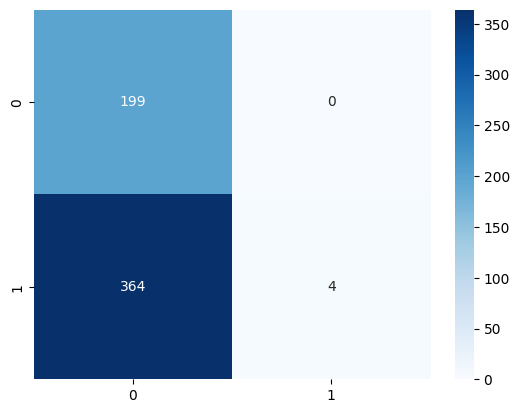

In [ ]:
sns.heatmap(confusion_matrix(Y_test, predictions), annot = True, cmap = 'Blues', fmt='0.4g')

In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.35      1.00      0.52       199
         1.0       1.00      0.01      0.02       368

    accuracy                           0.36       567
   macro avg       0.68      0.51      0.27       567
weighted avg       0.77      0.36      0.20       567



In [ ]:
precision_lr,recall_lr,fscore_lr,support_lr=score(Y_test, predictions,average='macro')
print('Precision : {}'.format(precision_lr))
print('Recall    : {}'.format(recall_lr))
print('F-score   : {}'.format(fscore_lr))
print('Support   : {}'.format(support_lr))

Precision : 0.6767317939609236
Recall    : 0.5054347826086957
F-score   : 0.2719075438150876
Support   : None


**Recall** score tells how many persons were predicted as having a heart disease amongst the total number of persons actually having a heart disease. Recall is also referred to as True positive rate or sensitivity

**Precision** tells how many persons were actually having a heart disease amongst the total number of persons that were predicted as having a heart disease. Precision is also referred to as positive predictive value.

#### Creating a RandomForestClassifier model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
Y_pred_rfc = classifier.predict(X_test)
print("accuracy score : ", str(accuracy_score(Y_test, Y_pred_rfc)*100))

accuracy score :  98.76543209876543


<Axes: >

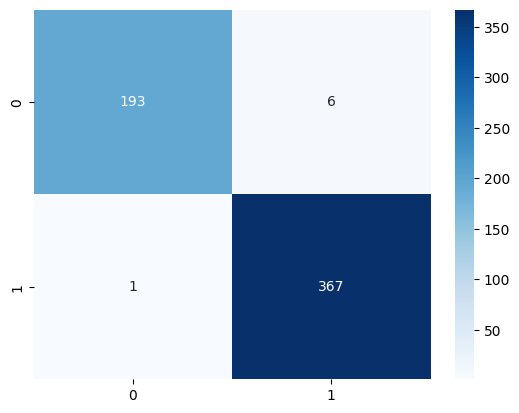

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_pred_rfc), annot = True, cmap = 'Blues', fmt='0.4g')

In [ ]:
print(classification_report(Y_test, Y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       199
         1.0       0.98      1.00      0.99       368

    accuracy                           0.99       567
   macro avg       0.99      0.98      0.99       567
weighted avg       0.99      0.99      0.99       567



In [ ]:
precision_rfc,recall_rfc,fscore_rfc,support_rfc=score(Y_test, Y_pred_rfc,average='macro')
print('Precision : {}'.format(precision_rfc))
print('Recall    : {}'.format(recall_rfc))
print('F-score   : {}'.format(fscore_rfc))
print('Support   : {}'.format(support_rfc))

Precision : 0.9893797849700119
Recall    : 0.983565927463404
F-score   : 0.9863708007540872
Support   : None


#### Building SVM model

In [ ]:
from sklearn import svm

In [ ]:
cls = svm.SVC(kernel="linear")

In [ ]:
cls.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
Y_pred_svm = cls.predict(X_test)

In [ ]:
print("accuracy score : ", str(accuracy_score(Y_test, Y_pred_svm)*100))

accuracy score :  42.32804232804233


<Axes: >

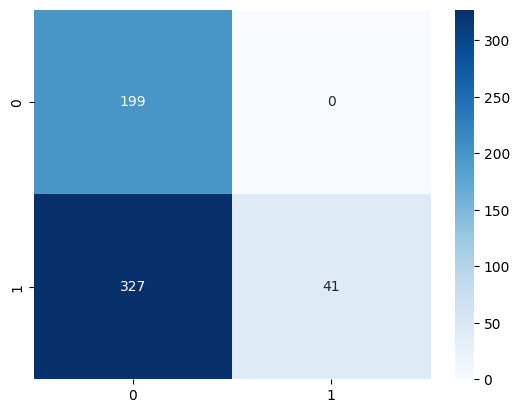

In [ ]:
sns.heatmap(confusion_matrix(Y_test, Y_pred_svm), annot = True, cmap = 'Blues', fmt='0.4g')

In [ ]:
print(classification_report(Y_test, Y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.38      1.00      0.55       199
         1.0       1.00      0.11      0.20       368

    accuracy                           0.42       567
   macro avg       0.69      0.56      0.37       567
weighted avg       0.78      0.42      0.32       567



In [ ]:
precision_svm,recall_svm,fscore_svm,support_svm=score(Y_test, Y_pred_svm,average='macro')
print('Precision : {}'.format(precision_svm))
print('Recall    : {}'.format(recall_svm))
print('F-score   : {}'.format(fscore_svm))
print('Support   : {}'.format(support_svm))

Precision : 0.6891634980988594
Recall    : 0.5557065217391304
F-score   : 0.3747272573981958
Support   : None


## Formatted table to compare the model

In [ ]:
from prettytable import PrettyTable

In [ ]:
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model Name", "Testing Accuracy", "Precision", "Recall", "F-score", "Support"])

In [ ]:
# Adding rows to the table
myTable.add_row(["Logistic Regression", round(accuracy_score(Y_test, predictions)*100, 3), precision_lr, recall_lr, fscore_lr, support_lr])
myTable.add_row(["Random Forest Classifier", round(accuracy_score(Y_test, Y_pred_rfc)*100,3), precision_rfc, recall_rfc, fscore_rfc, support_rfc])
myTable.add_row(["SVM", round(accuracy_score(Y_test, Y_pred_svm)*100,3), precision_svm, recall_svm, fscore_svm, support_svm])

In [ ]:
print(myTable)

+--------------------------+------------------+--------------------+--------------------+--------------------+---------+
|        Model Name        | Testing Accuracy |     Precision      |       Recall       |      F-score       | Support |
+--------------------------+------------------+--------------------+--------------------+--------------------+---------+
|   Logistic Regression    |      35.802      | 0.6767317939609236 | 0.5054347826086957 | 0.2719075438150876 |   None  |
| Random Forest Classifier |      98.765      | 0.9893797849700119 | 0.983565927463404  | 0.9863708007540872 |   None  |
|           SVM            |      42.328      | 0.6891634980988594 | 0.5557065217391304 | 0.3747272573981958 |   None  |
+--------------------------+------------------+--------------------+--------------------+--------------------+---------+


### Hyperparameter Tuning on LogisticRegression

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
model = LogisticRegression()

In [ ]:
penalty = ['l2']

In [ ]:
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
grid = dict(penalty=penalty,C=c_values)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [ ]:
grid_result = grid_search.fit(X_train, Y_train)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.995709 using {'C': 100, 'penalty': 'l2'}


In [ ]:
means = grid_result.cv_results_['mean_test_score']

In [ ]:
stds = grid_result.cv_results_['std_test_score']

In [ ]:
params = grid_result.cv_results_['params']

In [ ]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.995709 (0.002392) with: {'C': 100, 'penalty': 'l2'}
0.995296 (0.002282) with: {'C': 10, 'penalty': 'l2'}
0.993331 (0.002538) with: {'C': 1.0, 'penalty': 'l2'}
0.991005 (0.002926) with: {'C': 0.1, 'penalty': 'l2'}
0.987697 (0.003922) with: {'C': 0.01, 'penalty': 'l2'}


In [ ]:
model_bestParams = LogisticRegression(penalty='l2', C=10)

In [ ]:
model_bestParams.fit(X_train, Y_train)

LogisticRegression(C=10)

In [ ]:
predictions_grid_lr = model_bestParams.predict(X_test)

In [ ]:
print("accuracy score : ", str(accuracy_score(Y_test, predictions_grid_lr)*100))

accuracy score :  59.9647266313933


<Axes: >

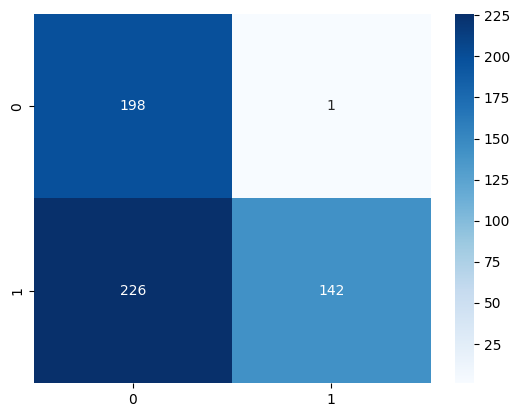

In [ ]:
sns.heatmap(confusion_matrix(Y_test, predictions_grid_lr), annot = True, cmap = 'Blues', fmt='0.4g')

In [ ]:
print(classification_report(Y_test, predictions_grid_lr))

              precision    recall  f1-score   support

         0.0       0.47      0.99      0.64       199
         1.0       0.99      0.39      0.56       368

    accuracy                           0.60       567
   macro avg       0.73      0.69      0.60       567
weighted avg       0.81      0.60      0.58       567



### Hyperparameter Tuning on RandomForestClassifier

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [ ]:
rfc = RandomForestClassifier()
rsc = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, scoring = 'accuracy', n_iter = 3, cv = 4, random_state = 42, verbose = 2)

In [ ]:
rsc.fit(X_train, Y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimato

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=3,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
pd.DataFrame(rsc.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      11.493818      2.842051         0.436669        0.201412   
1       8.647175      0.509913         0.263885        0.005442   
2       2.360735      0.289436         0.075366        0.013095   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                900                       5                      5   
1               1100                      10                      2   
2                300                     100                      5   

  param_max_features param_max_depth  \
0               sqrt              10   
1               sqrt              15   
2               auto              15   

                                              params  split0_test_score  \
0  {'n_estimators': 900, 'min_samples_split': 5, ...           0.991315   
1  {'n_estimators': 1100, 'min_samples_split': 10...           0.992556   
2  {'n_estimators': 300, 'min_samples_split': 100...           0.985732   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.995037           0.996898           0.996898         0.995037   
1           0.995037           0.998139           0.996278         0.995502   
2           0.990695           0.993797           0.991315         0.990385   

   std_test_score  rank_test_score  
0        0.002279                2  
1        0.002028                1  
2        0.002926                3

In [ ]:
rsc.best_score_*100

99.55024813895781

In [ ]:
rsc.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [ ]:
classifier_RandomForest_BestParams = RandomForestClassifier(n_estimators=rsc.best_params_['n_estimators'], min_samples_split=rsc.best_params_['min_samples_split'], min_samples_leaf=rsc.best_params_['min_samples_leaf'], max_features=rsc.best_params_['max_features'], max_depth=rsc.best_params_['max_depth'])

In [ ]:
classifier_RandomForest_BestParams.fit(X_train, Y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1100)

In [ ]:
predictions_rfc_bestParams = classifier_RandomForest_BestParams.predict(X_test)

In [ ]:
print("accuracy score : ", str(accuracy_score(Y_test, predictions_rfc_bestParams)*100))

accuracy score :  98.58906525573192


<Axes: >

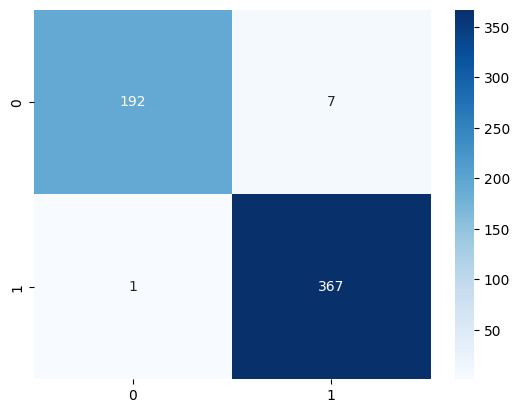

In [ ]:
sns.heatmap(confusion_matrix(Y_test, predictions_rfc_bestParams), annot = True, cmap = 'Blues', fmt='0.4g')

In [ ]:
print(classification_report(Y_test, predictions_rfc_bestParams))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       199
         1.0       0.98      1.00      0.99       368

    accuracy                           0.99       567
   macro avg       0.99      0.98      0.98       567
weighted avg       0.99      0.99      0.99       567

